In [ ]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 15.6 MB/s eta 0:00:00


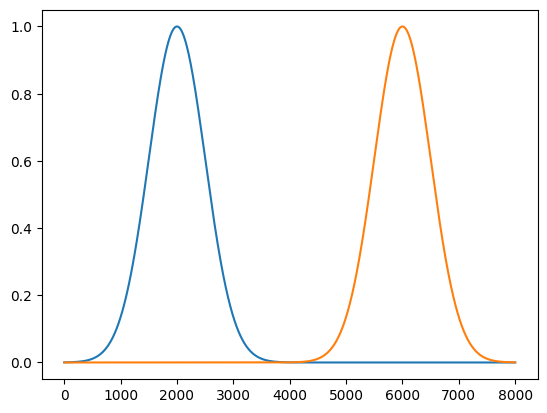

In [ ]:
rpm = np.arange(0, 8001, 1)
load = np.arange(0, 101, 1)

rpm_low = fuzz.gaussmf(rpm, 2000, 500)
rpm_high = fuzz.gaussmf(rpm, 6000, 500)

plt.plot(rpm, rpm_low)
plt.plot(rpm, rpm_high)
plt.show()

In [ ]:
def gaussian(x, c, s):
  return np.exp(-((x-c)**2)/(2*s**2))

def anfis_manual(x1, x2):
  w = [
      gaussian(x1, 2000, 500)*gaussian(x2, 30, 10),
      gaussian(x1, 2000, 500)*gaussian(x2, 70, 10),
      gaussian(x1, 6000, 500)*gaussian(x2, 30, 10),
      gaussian(x1, 6000, 500)*gaussian(x2, 70, 10),
  ]
  w_in = sum(w)
  wn = [wi/w_in for wi in w]
  p=[0.02,0.01,0.03,0.02]
  q=[0.5,0.6,0.4,0.3]
  r=[10,12,11,15]
  f=[p[i]*x1+q[i]*2+r[i] for i in range(4)]
  return sum(wn[i]*f[i] for i in range(4))

anfis_manual(3000,50)

np.float64(57.10000355611112)